# OSS: One Sided Selection for Undersampling

É uma técnica de undersampling que combina Tomek Links e a regra Condensed Nearest Neighbor (CNN). Especificamente, Tomek Links são pontos ambíguos na fronteira entre as classes e são identificados e removidos na classe majoritária. O método CNN então é utilizado para remover exemplos redundantes da classe majoritária que estão distantes da curva de decisão (fronteira).

## Procedimento:

O procedimento acontece em um passo:

1. Seja S o dataset original
2. Inicialmente, C contém todos os exemplos positivos de S e um exemplo negativo escolhido aleatoriamente.
3. Classifique S utilizando kNN, com k  = 1, utilizando os exemplos de C, e compare os resultados previstos com os originais. Mova todos os exemplos classificados incorretamente para C que está agora consistente com S, enquanto C < S.
4. Remova de C todos os exemplos negativos que são também Tomek Links. Isso remove aqueles exemplos negativos que podem ser de ruído ou fazer parte da fronteira. Todos os exemplos positivos são mantidos. O conjunto resultante é chamado de T.

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from numpy import where
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import NeighbourhoodCleaningRule

In [ ]:
##########  DATASET DESBALANCEADO   #############
plt.style.use('default')
#plt.style.use('fivethirtyeight')
plt.style.use('bmh')
plt.rcParams['font.family'] = 'Serif'

plt.figure(figsize=(10,6))
# definir dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99],
                           flip_y=0, random_state=1)
counter = Counter(y)
print(counter)

# scatter plot dos exemplos por class label
#for label, _ in counter.items():
#  row_xi = where(y == label)[0]
#  plt.scatter(X[row_xi, 0], X[row_xi, 1], 10,label = str(label))

#plt.grid(False)
#plt.title('Dataset desbalanceado')
#plt.legend()
#plt.tight_layout()
#plt.savefig('dsdesbalanceado.png')
#plt.show()

Counter({0: 9900, 1: 100})


<Figure size 1000x600 with 0 Axes>

Counter({0: 933, 1: 100})


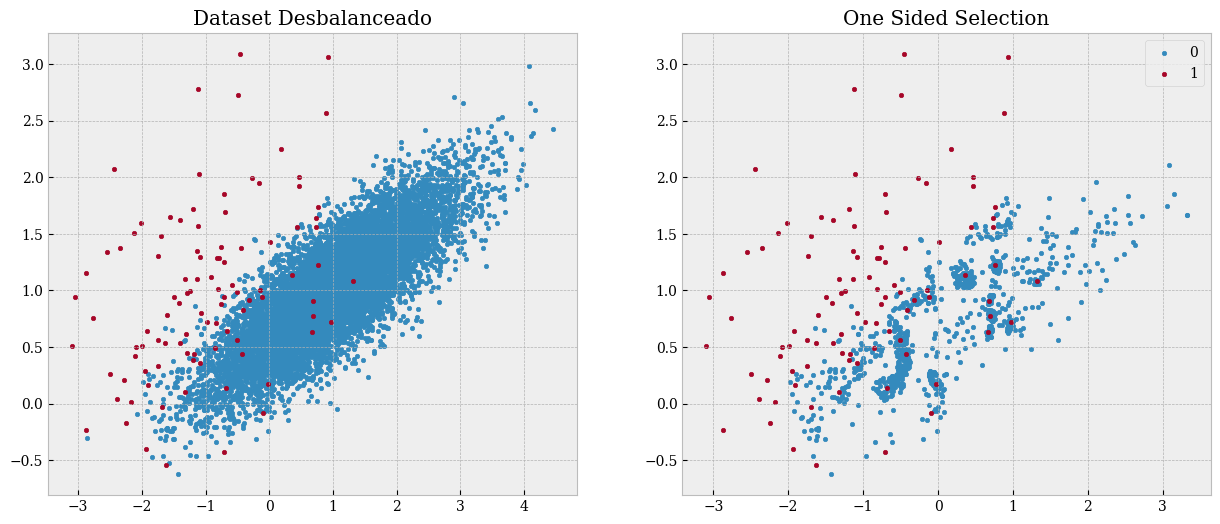

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

for label, _ in counter.items():
  row_xi = where(y == label)[0]
  axs[0].scatter(X[row_xi, 0], X[row_xi, 1], 10,label = str(label))
axs[0].set_title('Dataset Desbalanceado')
#plt.legend()

##########  APLICAR OSS   #############
under = OneSidedSelection(n_neighbors=1, n_seeds_S=200)
X_under, y_under = under.fit_resample(X,y)

counter= Counter(y_under)
print(counter)

# scatter plot dos exemplos por class label
#plt.figure(figsize=(10,6))
for label, _ in counter.items():
  row_xi = where(y_under == label)[0]
  axs[1].scatter(X_under[row_xi, 0], X_under[row_xi, 1], 10, label = str(label))

#plt.grid(False)
axs[1].set_title('One Sided Selection')
plt.legend()
#fig.tight_layout()
plt.show()

# NCR: Neighbourhood Cleaning Rule for Undersampling

É uma técnica de undersampling que combina CNN para remover exemplos redundantes e ENN para remover exemplos considerados ruído ou redundantes.<br>
Assim como a OSS, a técnica CNN é aplicada em um procedimento de um passo, então os exemplos classificados incorretamente de acordo com um classificador KNN são removidos, como é feito no ENN.<br>
Diferente do OSS, menos exemplos redundantes são removidos com o CNN e mais atenção é colocada em fazer uma limpa nos exemplos que ficaram. O motivo disso é para focar menos em melhorar o balanceamento das classes e mais em na qualidade (redução de ruídos) dos exemplos que são mantidos na classe majoritária.

>... the quality of classification results does not necessarily depend on the size of the class. Therefore, we should consider, besides the class distribution, other characteristics of data, such as noise, that may hamper classification.

Counter({0: 9786, 1: 100})


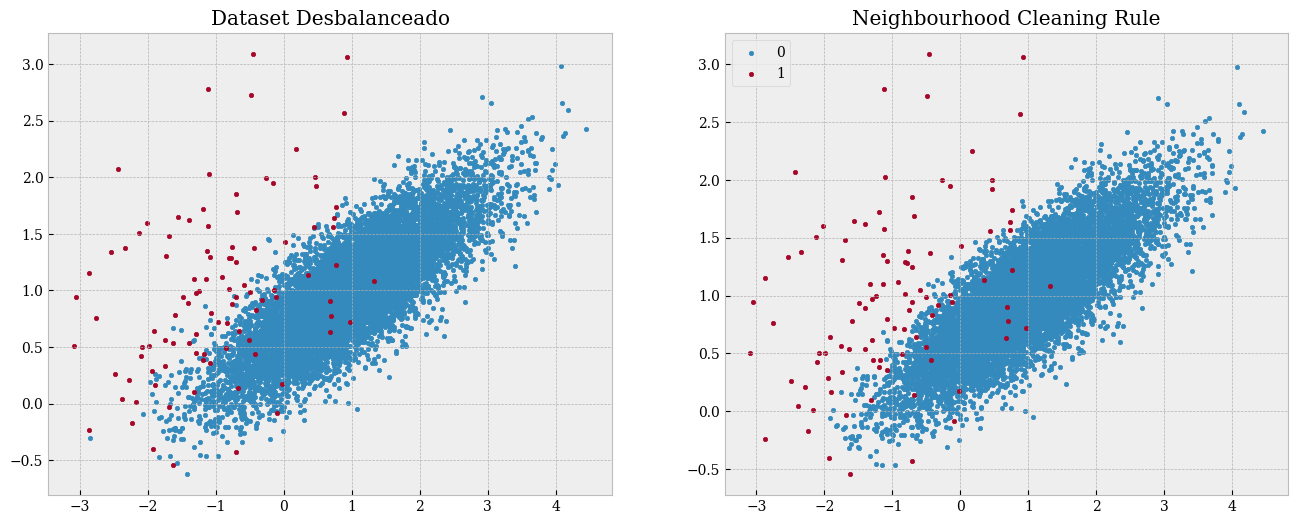

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

for label, _ in counter.items():
  row_xi = where(y == label)[0]
  axs[0].scatter(X[row_xi, 0], X[row_xi, 1], 10,label = str(label))
axs[0].set_title('Dataset Desbalanceado')

##### NCR #####
under = NeighbourhoodCleaningRule()
X_under, y_under = under.fit_resample(X,y)

counter= Counter(y_under)
print(counter)

# scatter plot dos exemplos por class label
#plt.figure(figsize=(10,6))
for label, _ in counter.items():
  row_xi = where(y_under == label)[0]
  axs[1].scatter(X_under[row_xi, 0], X_under[row_xi, 1], 10, label = str(label))

#plt.grid(False)
axs[1].set_title('Neighbourhood Cleaning Rule')
plt.legend()
#fig.tight_layout()
plt.show()